In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#df=sns.load_dataset('titanic')
import pandas as pd

file_id = "1mVqbydi4D0KadYj9CSx6oK-bGmzmIVDY"
csv_url = f"https://drive.google.com/uc?id={file_id}"
csv_url1="https://drive.google.com/uc?id=1wd1ZilahngL5l6CpNd3ZB_2Cq6dHDZw5"
df = pd.read_csv(csv_url)
test = pd.read_csv(csv_url1)
#df = pd.read_csv('https://drive.google.com/file/d/1mVqbydi4D0KadYj9CSx6oK-bGmzmIVDY/view?usp=drive_link')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


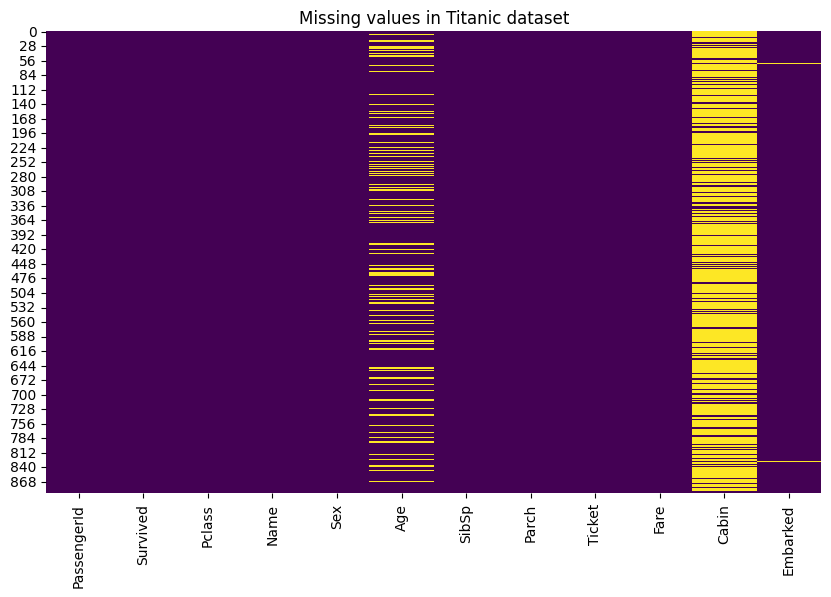

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Missing values in Titanic dataset")
plt.show()

In [23]:
df.isnull().sum()


df['Age'] = df['Age'].fillna(df['Age'].median())

 # 이유: 이상치 영향을 줄이기 위해 중앙값 사용

df['Cabin'] = df['Cabin'].fillna('Unknown')#이유:결측치가 너무 많음

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])#이유: 결측치가 적어서 최빈값으로



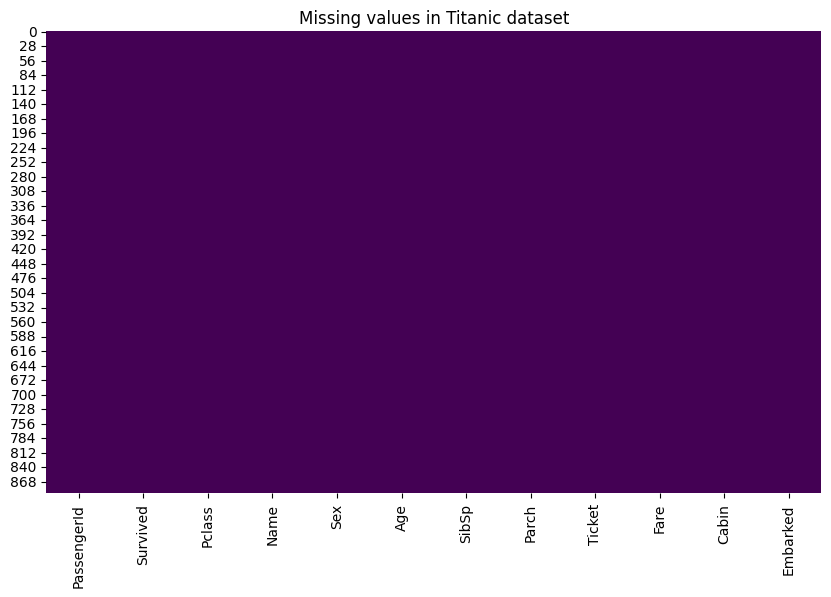

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Missing values in Titanic dataset")
plt.show()

Text(0.5, 1.0, 'Before Outlier Removal')

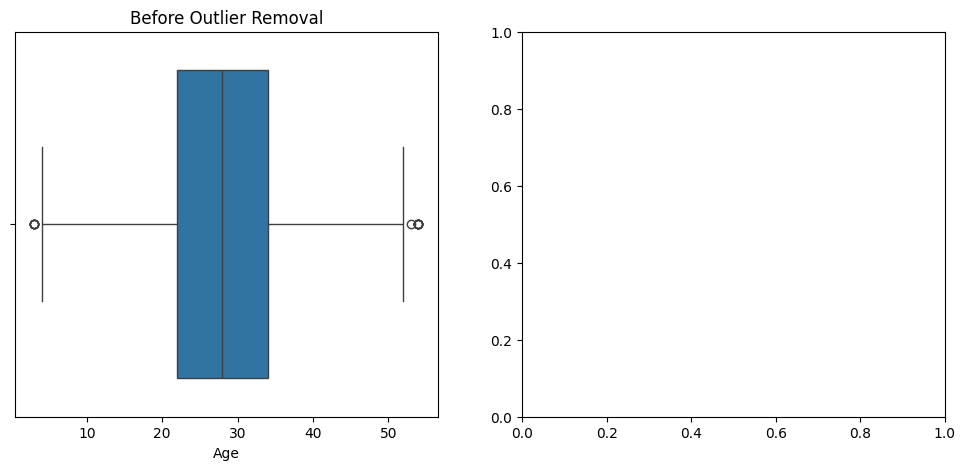

In [25]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

df = df[(df['Age']>= lower_bound)&(df['Age']<=upper_bound)].copy()
#이상치 제거 이전
fig,axes =plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x=df['Age'],ax=axes[0])
axes[0].set_title('Before Outlier Removal')



In [26]:
scaler_std=StandardScaler()


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df.dropna(inplace=True)  # 결측치 제거

# 범주형 → 숫자로 변환
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
#df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 입력/출력 나누기
X = df.drop(columns=['Survived'])
y = df['Survived']

# 학습용/테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 스케일링 함수 정의 (수정하지 마세요)
def scale_features(X_train, X_test, scaler, cols=['Age', 'Fare']):
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    X_train_scaled[cols] = scaler.fit_transform(X_train[cols])
    X_test_scaled[cols] = scaler.transform(X_test[cols])
    return X_train_scaled, X_test_scaled

# 사용 예시
scaler = StandardScaler()
X_train_std, X_test_std = scale_features(X_train, X_test, scaler, cols=['Age', 'Fare'])




<ipython-input-28-88b31e568f35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)  # 결측치 제거
<ipython-input-28-88b31e568f35>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


| 항목       | 전처리 전                   | 전처리 후                   |
| -------- | ----------------------- | ----------------------- |
| 행 수      | 891                     | 712                     |
| 열 수      | 12                      | 6                       |
| 제거된 컬럼   | Name, Ticket, Cabin 등   | —                       |
| 결측치 처리   | Age, Embarked 등 결측치 존재  | 결측치 제거 완료               |
| 컬럼 타입 변화 | Sex(str), Embarked(str) | Sex(int), Embarked(int) |


In [29]:
#모델 실험



In [30]:
#모델 실험
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

best_acc = 0
best_model = None

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_model = model  # 이 모델이 현재까지 최고 정확도
best_model


Logistic Accuracy: 0.8182
RandomForest Accuracy: 0.8364
XGBoost Accuracy: 0.8364


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:46:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomForestClassifier(random_state=42)

In [31]:
#test데이터 전처리
test.isnull().sum()


test['Age'] = test['Age'].fillna(test['Age'].median())

 # 이유: 이상치 영향을 줄이기 위해 중앙값 사용

#test['Cabin'] = test['Cabin'].fillna('Unknown')#이유:결측치가 너무 많음

test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])#이유: 결측치가 적어서 최빈값으로

In [32]:
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
#test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [34]:
test_X = test[['Pclass', 'Sex', 'Age', 'Fare']]
test_X[['Age', 'Fare']] = scaler.transform(test_X[['Age', 'Fare']])


y_pred = best_model.predict(test_X)

# 결과 저장
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})
submission.to_csv('submission.csv', index=False)

<ipython-input-34-cf5f743de24f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X[['Age', 'Fare']] = scaler.transform(test_X[['Age', 'Fare']])
